# Visualization

In [1]:
import pandas as pd
import json

from matplotlib.ticker import MaxNLocator
from matplotlib import cm

import matplotlib.pyplot as plt
import numpy as np


In [2]:
with open('./compare_result_26.json') as json_file:
    result = json.load(json_file)

In [3]:
all_epochs = [int(x) for x in result.keys()]
max_epoch = max(all_epochs)
middle_epoch = sorted(all_epochs)[(len(all_epochs) + 1) // 2]

In [4]:
result.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '9', '10', '11', '15', '16', '17', '18', '19', '20', '22', '23', '24', '25', '26'])

## Versus Agents

In [5]:
df = pd.DataFrame({
    'epoch': [int(x) for x in result.keys()],
    'RandomPlayer': [
        [
            g['result']
            for g in result[e]['RandomPlayer']
        ]
        for e in result.keys()
    ],
    'RandomPlayerStarter': [
        [
            g['result']
            for g in result[e]['RandomPlayer']
            if g['starter']
        ]
        for e in result.keys()
    ],
    'RandomPlayerNotStarter': [
        [
            g['result']
            for g in result[e]['RandomPlayer']
            if not g['starter']
        ]
        for e in result.keys()
    ],
    'SettlementFirstPlayer': [
        [
            g['result']
            for g in result[e]['SettlementFirstPlayer']
        ]
        for e in result.keys()
    ],
    'SettlementFirstPlayerStarter': [
        [
            g['result']
            for g in result[e]['SettlementFirstPlayer']
            if g['starter']
        ]
        for e in result.keys()
    ],
    'SettlementFirstPlayerNotStarter': [
        [
            g['result']
            for g in result[e]['SettlementFirstPlayer']
            if not g['starter']
        ]
        for e in result.keys()
    ],
    'CustomRLPlayer': [
        [
            g['result']
            for g in result[e]['CustomRLPlayer']
        ]
        for e in result.keys()
    ],
    'CustomRLPlayerStarter': [
        [
            g['result']
            for g in result[e]['CustomRLPlayer']
            if g['starter']
        ]
        for e in result.keys()
    ],
    'CustomRLPlayerNotStarter': [
        [
            g['result']
            for g in result[e]['CustomRLPlayer']
            if not g['starter']
        ]
        for e in result.keys()
    ],
})
df

,epoch,RandomPlayer,RandomPlayerStarter,RandomPlayerNotStarter,SettlementFirstPlayer,SettlementFirstPlayerStarter,SettlementFirstPlayerNotStarter,CustomRLPlayer,CustomRLPlayerStarter,CustomRLPlayerNotStarter
0,1,"[1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -...","[1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -...","[-1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1,...","[1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, ...","[1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1...","[-1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
1,2,"[1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1...","[1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[-1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, ...","[-1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1...","[-1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1,...","[-1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1...","[1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
3,4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1...","[1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1...","[1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, ...","[-1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1...","[-1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1,...","[-1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
4,5,"[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1,...","[-1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1,...","[1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
5,6,"[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, ...","[1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, ...","[-1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
6,7,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1...","[-1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, ...","[-1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1,...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
7,9,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1...","[-1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, ...","[1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
8,10,"[1, 1, 1, 

### Not lost

In [6]:
def not_lost(x):
    return len([y for y in x if y >= -0.5])

df['Random agent'] = df['RandomPlayer'].apply(not_lost)
df['SettlementFirst agent'] = df['SettlementFirstPlayer'].apply(not_lost)
df['CustomRL agent'] = df['CustomRLPlayer'].apply(not_lost)
df

,epoch,RandomPlayer,RandomPlayerStarter,RandomPlayerNotStarter,SettlementFirstPlayer,SettlementFirstPlayerStarter,SettlementFirstPlayerNotStarter,CustomRLPlayer,CustomRLPlayerStarter,CustomRLPlayerNotStarter,Random agent,SettlementFirst agent,CustomRL agent
0,1,"[1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -...","[1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -...","[-1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1,...","[1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, ...","[1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1...","[-1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",87,26,0
1,2,"[1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1...","[1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[-1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, ...","[-1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1...","[-1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",92,40,0
2,3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1,...","[-1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1...","[1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",95,44,0
3,4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1...","[1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1...","[1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, ...","[-1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1...","[-1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1,...","[-1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",92,41,0
4,5,"[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1,...","[-1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1,...","[1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",96,44,0
5,6,"[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, ...","[1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, ...","[-1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, ...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",97,55,0
6,7,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1...","[-1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, ...","[-1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1,...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",98,55,0
7,9,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1...","[-1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, ...","[1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, 

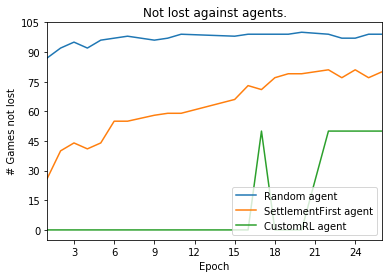

In [7]:
ax = df.plot(kind='line',x='epoch', y=['Random agent', 'SettlementFirst agent', 'CustomRL agent'], title='Not lost against agents.')
_ = ax.set_xlabel('Epoch')
_ = ax.set_ylabel('# Games not lost')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig('./not_lost.svg', format='svg')

In [8]:
def not_lost(x):
    return len([y for y in x if y >= -0.5])

df['Random agent total'] = df['RandomPlayer'].apply(not_lost)
df['SettlementFirst agent total'] = df['SettlementFirstPlayer'].apply(not_lost)
df['CustomRL agent total'] = df['CustomRLPlayer'].apply(not_lost)
df['Random agent as starter'] = df['RandomPlayerStarter'].apply(not_lost)
df['SettlementFirst agent as starter'] = df['SettlementFirstPlayerStarter'].apply(not_lost)
df['CustomRL agent as starter'] = df['CustomRLPlayerStarter'].apply(not_lost)
df['Random agent as not starter'] = df['RandomPlayerNotStarter'].apply(not_lost)
df['SettlementFirst agent as not starter'] = df['SettlementFirstPlayerNotStarter'].apply(not_lost)
df['CustomRL agent as not starter'] = df['CustomRLPlayerNotStarter'].apply(not_lost)

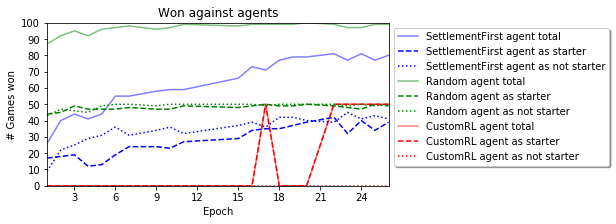

In [9]:
f, ax = plt.subplots(1, 1, figsize=(9, 3))

ax = df.plot(ax=ax, kind='line', alpha=0.5, color=['g', 'b', 'r'], x='epoch', y=['Random agent total', 'SettlementFirst agent total', 'CustomRL agent total'], title='Won against agents')
ax = df.plot(ax=ax, kind='line', linestyle='--', color=['g', 'b', 'r'], x='epoch', y=['Random agent as starter', 'SettlementFirst agent as starter', 'CustomRL agent as starter'])
ax = df.plot(ax=ax, kind='line', linestyle=':', color=['g', 'b', 'r'], x='epoch', y=['Random agent as not starter', 'SettlementFirst agent as not starter', 'CustomRL agent as not starter'])


_ = ax.set_xlabel('Epoch')
_ = ax.set_ylabel('# Games won')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0, 100)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.68, chartBox.height])
handles, labels = ax.get_legend_handles_labels()
handles, labels = zip(*(sorted(zip(handles, labels), key=lambda t: t[1], reverse=True)))
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.33, 1), shadow=True, ncol=1)
plt.savefig('./not_lost.svg', format='svg')

# Won

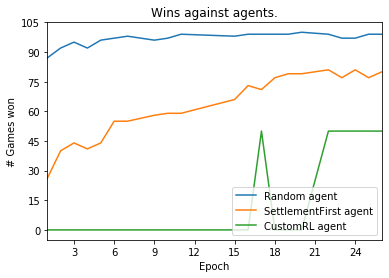

In [10]:
def won(x):
    return len([y for y in x if y == 1])

df['Random agent'] = df['RandomPlayer'].apply(not_lost)
df['SettlementFirst agent'] = df['SettlementFirstPlayer'].apply(not_lost)
df['CustomRL agent'] = df['CustomRLPlayer'].apply(not_lost)
df

ax = df.plot(kind='line',x='epoch', y=['Random agent', 'SettlementFirst agent', 'CustomRL agent'], title='Wins against agents.')
_ = ax.set_xlabel('Epoch')
_ = ax.set_ylabel('# Games won')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig('./won.svg', format='svg')

## Board Heat

In [11]:
BOARD_MASK = np.array([
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    ])

/home/jeroen/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


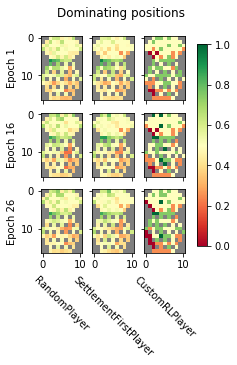

In [12]:
f, axes = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(3, 4))
cmap = viridis = cm.get_cmap('RdYlGn')
cmap.set_bad(color='grey')

epochs = [1, middle_epoch, max_epoch]
opponents = ['RandomPlayer', 'SettlementFirstPlayer', 'CustomRLPlayer']

for epoch, axs in zip(epochs, axes):
    axs[0].set_ylabel(f'Epoch {epoch}')
    for opponent, ax in zip(opponents, axs):
        a = np.mean(np.array([
            g['board']
            for g in result[str(epoch)][opponent]
        ]), axis=0)
        a += 1
        a /= 2
        im = ax.imshow(a / BOARD_MASK, cmap=cmap, interpolation='nearest', vmin=0, vmax=1)

for opponent, i in zip(opponents, range(3)):
    axes[-1][i].set_xlabel(opponent, rotation=-45)
    

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = f.colorbar(im, cax=cbar_ax)

_ = f.suptitle("Dominating positions")

f.savefig('./board_heat.svg', format='svg')

## As Starter

/home/jeroen/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


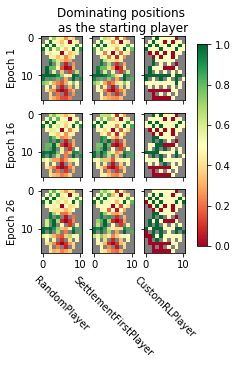

In [13]:
f, axes = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(3, 4))
cmap = viridis = cm.get_cmap('RdYlGn')
cmap.set_bad(color='grey')

epochs = [1, middle_epoch, max_epoch]
opponents = ['RandomPlayer', 'SettlementFirstPlayer', 'CustomRLPlayer']

for epoch, axs in zip(epochs, axes):
    axs[0].set_ylabel(f'Epoch {epoch}')
    for opponent, ax in zip(opponents, axs):
        a = np.mean(np.array([
            g['board']
            for g in result[str(epoch)][opponent]
            if g['starter']
        ]), axis=0)
        a += 1
        a /= 2
        im = ax.imshow(a / BOARD_MASK, cmap=cmap, interpolation='nearest', vmin=0, vmax=1)

for opponent, i in zip(opponents, range(3)):
    axes[-1][i].set_xlabel(opponent, rotation=-45)
    

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = f.colorbar(im, cax=cbar_ax)

_ = f.suptitle("Dominating positions\n as the starting player")

f.savefig('./board_heat_starter.svg', format='svg')

# As not starter

/home/jeroen/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


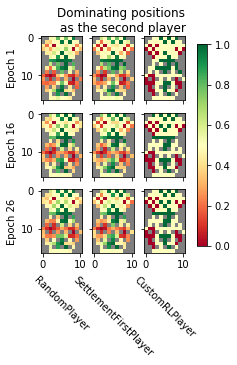

In [14]:
f, axes = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(3, 4))
cmap = viridis = cm.get_cmap('RdYlGn')
cmap.set_bad(color='grey')

epochs = [1, middle_epoch, max_epoch]
opponents = ['RandomPlayer', 'SettlementFirstPlayer', 'CustomRLPlayer']

for epoch, axs in zip(epochs, axes):
    axs[0].set_ylabel(f'Epoch {epoch}')
    for opponent, ax in zip(opponents, axs):
        a = np.mean(np.array([
            g['board']
            for g in result[str(epoch)][opponent]
            if not g['starter']
        ]), axis=0)
        a += 1
        a /= 2
        im = ax.imshow(a / BOARD_MASK, cmap=cmap, interpolation='nearest', vmin=0, vmax=1)

for opponent, i in zip(opponents, range(3)):
    axes[-1][i].set_xlabel(opponent, rotation=-45)
    

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = f.colorbar(im, cax=cbar_ax)

_ = f.suptitle("Dominating positions\n as the second player")

f.savefig('./board_heat_not_starter.svg', format='svg')

## Alpha Zero Heat

/home/jeroen/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


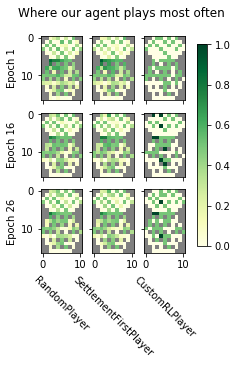

In [15]:
f, axes = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(3, 4))

cmap = viridis = cm.get_cmap('YlGn')
cmap.set_bad(color='grey')

for epoch, axs in zip(epochs, axes):
    axs[0].set_ylabel(f'Epoch {epoch}')
    for opponent, ax in zip(opponents, axs):
        a = np.array([
            g['board']
            for g in result[str(epoch)][opponent]
        ])
        a *= a > 0
        a = np.mean(a, axis=0)
        im = ax.imshow(a / BOARD_MASK, cmap='YlGn', interpolation='nearest', vmin=0, vmax=1)

for opponent, i in zip(opponents, range(3)):
    axes[-1][i].set_xlabel(opponent, rotation=-45)
    

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
_ = f.colorbar(im, cax=cbar_ax)

_ = f.suptitle("Where our agent plays most often")

f.savefig('./az_heat.svg', format='svg')

## Starter

/home/jeroen/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


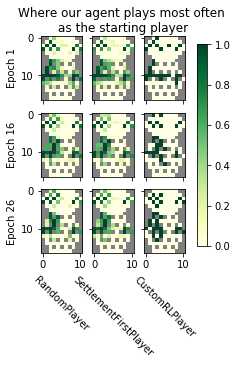

In [16]:
f, axes = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(3, 4))

cmap = viridis = cm.get_cmap('YlGn')
cmap.set_bad(color='grey')

for epoch, axs in zip(epochs, axes):
    axs[0].set_ylabel(f'Epoch {epoch}')
    for opponent, ax in zip(opponents, axs):
        a = np.array([
            g['board']
            for g in result[str(epoch)][opponent]
            if g['starter']
        ])
        a *= a > 0
        a = np.mean(a, axis=0)
        im = ax.imshow(a / BOARD_MASK, cmap='YlGn', interpolation='nearest', vmin=0, vmax=1)

for opponent, i in zip(opponents, range(3)):
    axes[-1][i].set_xlabel(opponent, rotation=-45)
    

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
_ = f.colorbar(im, cax=cbar_ax)

_ = f.suptitle("Where our agent plays most often\n as the starting player")
f.savefig('./az_heat_starter.svg', format='svg')

## Not starter

/home/jeroen/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


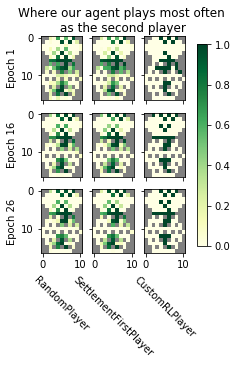

In [17]:
f, axes = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(3, 4))

cmap = viridis = cm.get_cmap('YlGn')
cmap.set_bad(color='grey')

for epoch, axs in zip(epochs, axes):
    axs[0].set_ylabel(f'Epoch {epoch}')
    for opponent, ax in zip(opponents, axs):
        a = np.array([
            g['board']
            for g in result[str(epoch)][opponent]
            if not g['starter']
        ])
        a *= a > 0
        a = np.mean(a, axis=0)
        im = ax.imshow(a / BOARD_MASK, cmap='YlGn', interpolation='nearest', vmin=0, vmax=1)

for opponent, i in zip(opponents, range(3)):
    axes[-1][i].set_xlabel(opponent, rotation=-45)
    

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
_ = f.colorbar(im, cax=cbar_ax)

_ = f.suptitle("Where our agent plays most often\n as the second player")

f.savefig('./az_heat_not_starter.svg', format='svg')

# Timing

In [18]:
import numpy as np
x = np.random.randint(2, size=(17, 11))
x

array([[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]])

In [19]:
%%timeit
_ = np.pad(x.copy(), 1, constant_values=(0,))

35.3 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [20]:
%%timeit
_ = np.pad(x, 1, constant_values=(0,))

34.6 µs ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%%timeit
y = np.zeros((x.shape[0] + 2, x.shape[1] + 2))
y[1:-1,1:-1] = x.copy()

2.02 µs ± 89.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [22]:
%%timeit
y = np.zeros((x.shape[0] + 2, x.shape[1] + 2))
y[1:-1,1:-1] = x

1.28 µs ± 11.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [23]:
%%timeit
np.zeros((18, 18))

424 ns ± 14.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Check roads

In [24]:
ROAD_MASK = np.array([
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
])

road_adjacency = (
    (
        np.array([
            [0, 0, 1],
            [1, 0, 1],
            [0, 1, 0],
        ]),
        np.array([
            [0, 1, 0],
            [1, 0, 1],
            [0, 0, 1],
        ]),
    ),
    (
        np.array([
            [1, 1, 0],
            [0, 0, 0],
            [1, 1, 0],
        ]),
        np.array([
            [1, 1, 0],
            [0, 0, 0],
            [1, 1, 0],
        ]),
    )
)

road_adjacency_2 = (
    (
        [
            (0, 2),
            (1, 0),
            (1, 2),
            (2, 1),
        ],
        [
            (0, 1),
            (1, 0),
            (1, 2),
            (2, 2),
        ]
    ),
    (
        [
            
        ],
        np.array([
            [1, 1, 0],
            [0, 0, 0],
            [1, 1, 0],
        ]),
        np.array([
            [1, 1, 0],
            [0, 0, 0],
            [1, 1, 0],
        ]),
    )
)

def road_options(roads):
    result = np.zeros(roads.shape)
    padded = np.zeros((x.shape[0] + 2, x.shape[1] + 2))
    padded[1:-1,1:-1] = x
    for i, j in zip(*(ROAD_MASK * (roads == 0)).nonzero()):
        result[i, j] = ((
            (padded[i:i+3,j:j+3] > 0) * road_adjacency[i % 2][((i // 2) + j) % 2]
        ).sum() > 0).astype(int)
    return result

x = np.random.randint(2, size=(11, 11))

In [25]:
%%timeit
road_options(x)

531 µs ± 66.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
